In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
#check no of columns and rows in a dataframe
data.shape

(768, 9)

In [4]:
#check first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#check last few rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#check if there are any null values
data.isnull().values.any()

False

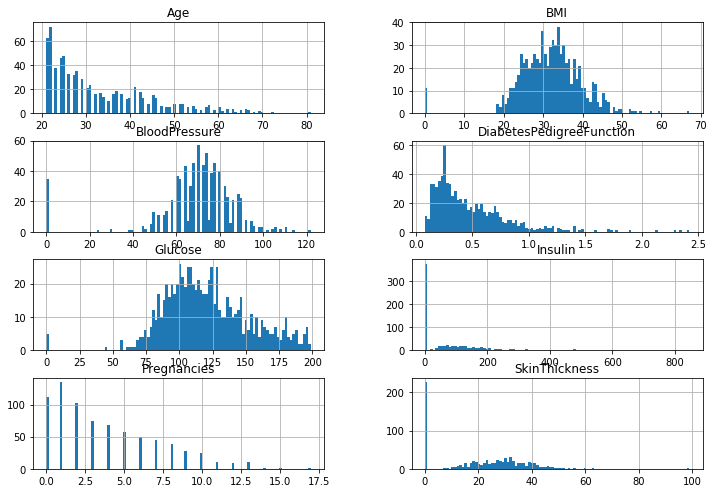

In [7]:
#histogram of first 8 columns
column=list(data)[0:-1]
data[column].hist(stacked=False,bins=100,figsize=(12,30),layout=(14,2));

In [8]:
#correlation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
#graphical representation
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

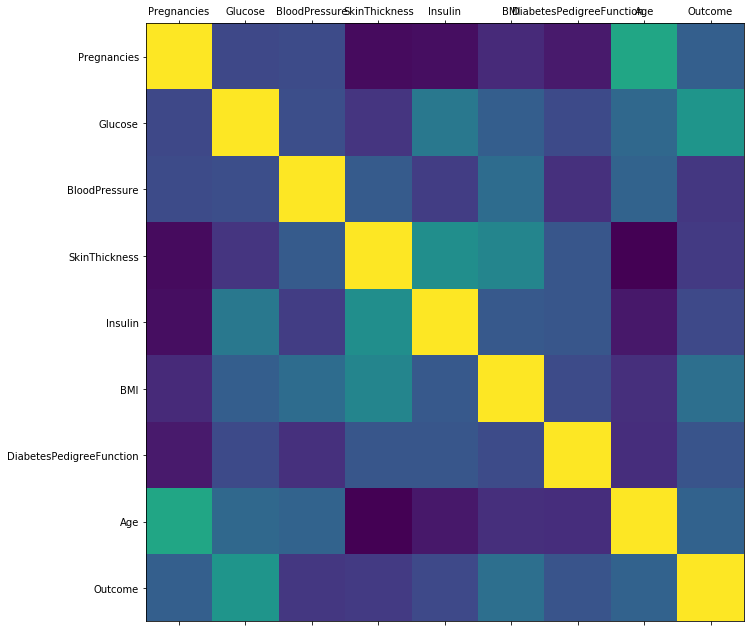

In [10]:
plot_corr(data)

In [11]:
#calculating ratio of true/false from outcome variable
n_true = len(data.loc[data['Outcome'] == True])
n_false = len(data.loc[data['Outcome'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


In [12]:
#splitting the data(70% for training and 30% for testing)
from sklearn.model_selection import train_test_split

features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

X = data[features_cols].values      
Y = data[predicted_class]. values   
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=52)
# I took 52 as just any random seed number

In [13]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

69.92% data is in training set
30.08% data is in test set


In [14]:
#true/false ratio in split data
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 1]), (len(data.loc[data['Outcome'] == 1])/len(data.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 0]), (len(data.loc[data['Outcome'] == 0])/len(data.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 192 (35.75%)
Training Diabetes False Values   : 345 (64.25%)

Test Diabetes True Values        : 76 (32.90%)
Test Diabetes False Values       : 155 (67.10%)



In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#replace 0's with serail mean
from sklearn.preprocessing import Imputer

rep_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = rep_0.fit_transform(x_train)
x_test = rep_0.fit_transform(x_test)

In [17]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

diab_lr_model = LogisticRegression(C=0.7, random_state=52)
diab_lr_model.fit(x_train, y_train.ravel())
lr_test_predict = diab_lr_model.predict(x_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, lr_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_test_predict, labels=[1, 0]))

Model Accuracy: 0.78

Confusion Matrix
[[ 46  30]
 [ 21 134]]

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.61      0.64        76
           0       0.82      0.86      0.84       155

   micro avg       0.78      0.78      0.78       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.78      0.78       231



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
